# Week 12: Proving NP-Completeness

In [2]:
from tock import *
settings.display_direction_as = "alpha"
from cooklevin import *

## Tuesday

Last time, we showed that the language $\mathit{TIME}_{\mathsf{NTM}}$ was NP-complete:

$$ \mathit{TIME}_{\mathsf{NTM}} = \{ \langle N, w, \texttt{1}^t\rangle \mid \text{NTM $N$ accepts $w$ within $t$ steps} \}. $$

Today, we start to consider other NP-complete languages.

### Proving NP-completeness using reductions

<div class="alert alert-info">
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/138qkn2y4AboizybnFPK2CvdDM7EP08iy/view?usp=sharing">W12E1: Proving NP-Completeness By Reduction.</a></p>
</div>

Now, we take the next step towards more real-world problems by showing that a simpler problem called 3SAT is NP-complete.

If we wanted to prove that 3SAT is NP-hard "from scratch", we'd have to give a polynomial-time reduction from *any* NP language $A$ to 3SAT:

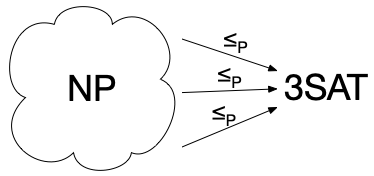

But now that we've proven that $\mathit{TIME}_{\mathsf{NTM}}$ is NP-complete, our task becomes slightly easier. We no longer have to show a reduction from *every* NP language $A$ to 3SAT; we know that every NP language reduces to $\mathit{TIME}_{\mathsf{NTM}}$, so it's enough to show a reduction from $\mathit{TIME}_{\mathsf{NTM}}$ to 3SAT, and we automatically get a reduction from every NP language $A$ to 3SAT:

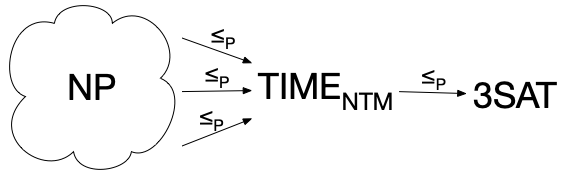

This is possible because polynomial-time reducibility is transitive. Here's a pictorial proof of this fact:

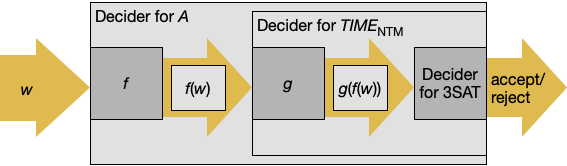

Once we've proven 3SAT NP-complete, we can prove that (say) CLIQUE is NP-complete by giving a reduction from 3SAT to CLIQUE, and so on.

Here's a picture of the reductions proven in the book (with the addition of $\mathit{TIME}_{\mathsf{NTM}}$):

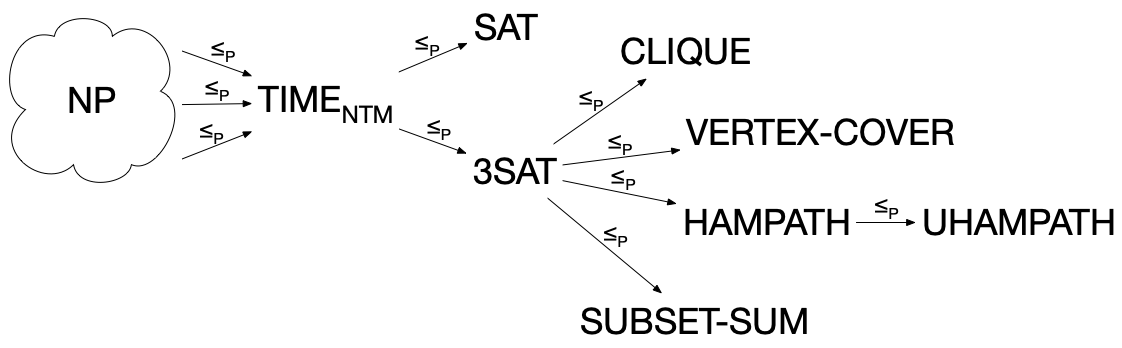

So we can revise our skeleton NP-completeness proof. To prove that a language $B$ is NP-complete by reduction from another NP-complete language $A$, you must do the following:

- To prove that $B$ is in NP, you either:
    - Give a polynomial-time deterministic verifier for it, or 
    - Give a polynomial-time NTM for it.
- To prove that $B$ is NP-hard, assume that $B$ can be decided in polynomial time by $R$, and construct a polynomial-time decider for $A$: $S={}$"On input $w$, 1. Compute $f(w)$. 2. Run $R$ on $f(w)$. 3. If $R$ accepts, *accept*; else, *reject*."
You fill in:
    - Define a mapping $f$ from instances of $A$ to instances of $B$.
    - Prove that $w \in A$ iff $f(w) \in B$.
    - Prove that $f$ runs in polynomial time.

### The Cook-Levin Theorem

<div class="alert alert-info">
    <p><b>Read</b> Section 7.4, "The Cook-Levin Theorem."</p>
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1urHX0__whKYnZck6H0075kcoI_jSY3j-/view?usp=sharing">W12E2: The Cook-Levin Theorem</a>.</p>
</div>    

A Boolean formula is made out of variables, negation ($\neg x$ or $\bar x$), conjunction ($\land$), and disjunction ($\lor$). A formula $\phi$ is *satisfiable* iff there is a way to assign true or false values to variables such that $\phi$ is true.

The Boolean satisfiability problem (SAT) is

$$ \{ \phi \mid \text{$\phi$ is satisfiable} \}. $$

Now we want to show that SAT is NP-complete.

#### The big picture

This is a really long proof. I think it's helpful to first look at how it lines up with our skeleton proof.

First, we have to show that SAT is in NP, which is easy. Let's get that out of the way: it's enough to say that we can check a truth-assignment for $\phi$ in time linear in the length of $\phi$.

To show that SAT is NP-hard, we need to show that if SAT was decidable in polynomial time by a TM $R$, we would be able to decide $\mathit{TIME}_{\mathsf{NTM}}$ in polynomial time, in three steps: On input $\langle N, w, \texttt{1}^t\rangle$,

1. Convert $\langle N, w, \texttt{1}^t\rangle$ to a Boolean formula $\phi$.
2. Run $R$ on $\phi$.
3. If $R$ accepts, *accept*; else, *reject*.

So all the work is in defining a function $f$ that converts $\langle N, w, \texttt{1}^t\rangle$ to a formula $\phi$, showing that that $\phi$ is satisfiable iff $N$ accepts $w$ within $t$ steps, and showing that $f$ runs in polynomial time.

#### The medium picture

Given $N$ and $w$, can can construct a *tableau*, which is a two-dimensional representation of a computation history for $N$ on $w$. The first row is the start configuration, and the following rows are the steps of the run. Each row is delimited by # on the left and right. Finally, if a row is an accepting configuration, the same configuration is repeated in the rows below it (this detail is missing from the book, but something like it seems necessary).

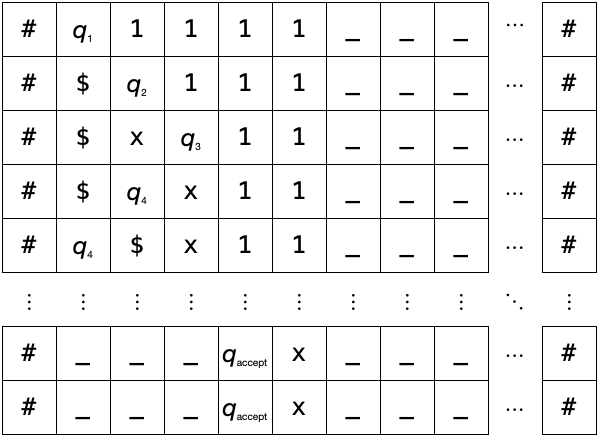

Because we only need to simulate $N$ up to $t$ steps, we can fix the size of the tableau in terms of $t$. There are $t+1$ rows: one row for the start configuration, plus one row for each step. And there are $t+4$ columns, because in $t$ steps, the head could move as far right as the $(t+1)th$ cell, plus one for the state, plus two for the #'s.

Now we need to write a giant formula $\phi$ that checks whether the tableau is an accepting computation history for $N$ on $w$. The variables of this formula are $x_{i,j,s}$, where $i$ is a row number, $j$ is a column number, and $s$ is either a tape symbol or a state. If $x_{i,j,s}$ is true, that means that cell $i,j$ contains symbol $s$. It's $\phi$'s job to check that a truth-assignment encodes a well-formed, accepting tableau.

The formula $\phi$ has four parts: $\phi = \phi_{\mathrm{cell}} \land \phi_{\mathrm{start}} \land \phi_{\mathrm{move}} \land \phi_{\mathrm{accept}}$. The purpose of these four parts is:

- $\phi_{\mathrm{cell}}$: Each cell contains exactly one symbol.
- $\phi_{\mathrm{start}}$: The first row of the tableau is the initial configuration of $N$.
- $\phi_{\mathrm{move}}$: Each row (except the first) is a configuration that legally follows the row above it according to $N$'s rules.
- $\phi_{\mathrm{accept}}$: The last row is an accepting configuration.

#### Every cell has exactly one symbol

Let $C = Q \cup \Gamma \cup \{\#\}$, the set of all possible symbols in a tableau cell. We ensure that every cell has exactly one symbol with the subformula:

\begin{align*}
\phi_{\text{cell}} = \bigwedge_{1 \leq i \leq t+1} \bigwedge_{1 \leq j \leq t+4} &\bigg[ && \text{for each cell,} \\
& \bigvee_{s \in C}  x_{i,j,s} \land {} && \text{each cell has at least one symbol} \\
& \bigwedge_{s,s' \in C, s \neq s'} \neg (x_{i,j,s} \land x_{i,j,s'}) && \text{and no cell has two symbols} \\
&\bigg]
\end{align*}

#### The first row is a start configuration

\begin{align*}
\phi_{\text{start}} = & x_{1,1,\#} \land {} && \text{left boundary} \\
                      & x_{1,2,q_0} \land{} && \text{start state} \\
                      & \bigwedge_{1 \leq i \leq n} x_{1,i+2,w_i} \land{} && \text{input string} \\
                      & \bigwedge_{n+1 \leq i \leq t+1} x_{1,i+2,\_} \land{} && \text{blank symbols} \\
                      & x_{1,t+4,\#} && \text{right boundary}
\end{align*}

#### Each row (except the first) follows from the previous row

This is the most complicated part of the formula.

\begin{align*}
\phi_{\text{move}} = \bigwedge_{1 \leq i \leq t} \bigwedge_{2 \leq j \leq t+1} &\bigg[ && \text{for each $2\times3$ window} \\
& \bigvee_{\text{$a_1, \ldots, a_6$ is a legal window}} x_{i,j-1,a_1} \land x_{i,j,a_2} \land x_{i,j+1,a_3} \land x_{i+1,j-1,a_4} \land x_{i+1,j,a_5} \land x_{i+1,j+1,a_6} && \text{the window is legal} \\
&\bigg]
\end{align*}

The book just gives a few examples of legal windows (Figure 7.39) but doesn't list them all out. If you like details to be completely worked out, here they are.

This is a legal window:

```
abc
abc
```

where a, b, and c are tape symbols, #, or $q_{\text{accept}}$.

Recall that if there is a transition $q \xrightarrow{b \rightarrow c, \text{L}} r$, then the configuration $uaqbv$ yields configuration $uracv$, where $u$ and $v$ are strings of tape symbols. So the following are all legal windows:

```
xya  yaq  aqb  qbx  bxy
xyr  yra  rac  acx  cxy
```

where $x$ and $y$ are any tape symbols or #.

A special case is when the head is at the left end of the tape and tries to move left ($qbv$ becomes $rcv$).

```
#qb  qbx
#rc  rcx 
```

Similarly, if there is a transition $q \xrightarrow{b \rightarrow c, \text{R}} r$, then the configuration $uaqbv$ yields configuration $uacrv$. So the following are all legal windows:

```
yaq  aqb  qbx  bxy
yac  acr  crx  rxy
```

where $x$ and $y$ are any tape symbols or #.

These 12 cases cover all possibilities -- nothing else is a legal window.

#### The last row is an accepting configuration

$$\phi_{\text{accept}} = \bigvee_{2 \leq j \leq t+2} x_{t+1,j,q_{\text{accept}}} $$

#### Demo

Here's an NTM for $\{\texttt{1}^n \mid \text{$n$ is composite}\}$:

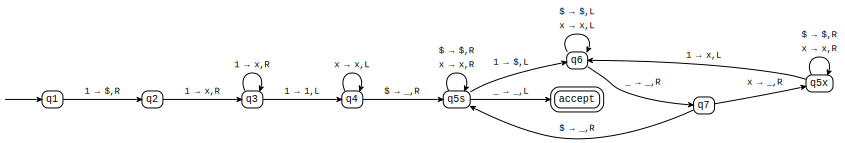

In [7]:
m = read_csv("primes.csv")
m

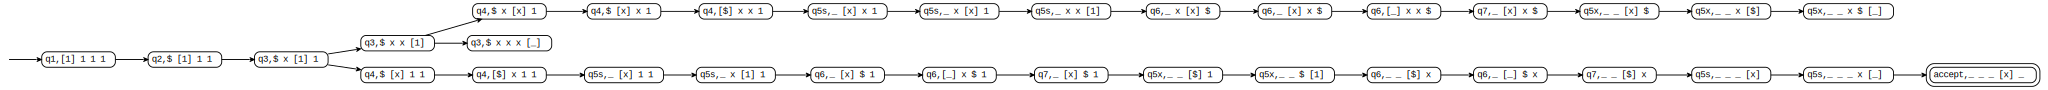

In [12]:
run(m, ["1"]*4)

In [13]:
run(m, ["1"]*4).shortest_path()

q1,[1] 1 1 1
q2,$ [1] 1 1
q3,$ x [1] 1
q4,$ [x] 1 1
q4,[$] x 1 1
q5s,_ [x] 1 1
q5s,_ x [1] 1
q6,_ [x] $ 1
q6,[_] x $ 1
q7,_ [x] $ 1
q5x,_ _ [$] 1


The running time of this NTM actually isn't bad -- bounded above by $3n^{3/2}$:

In [5]:
# Print n, actual running time, upper bound on running time
for n in range(20):
    r = run(m, ["1"] * n)
    if r.has_path():
        print(n, len(r.shortest_path().configs), 3*n**1.5)

4 18 24.0
6 28 44.090815370097204
8 38 67.88225099390857
9 53 81.0
10 48 94.86832980505137
12 58 124.70765814495917
14 68 157.14961024450554
15 95 174.28425057933376
16 78 192.0
18 88 229.10259710444143


Now we construct the formula corresponding to the run of this machine on `0000`:

In [6]:
phi = make_phi(m, ["1"]*4, 24)
print(phi.size()) # number of variables and operators in phi

8465141


It's too big to print, but we can look at the beginning:

In [7]:
print(str(phi)[:1000], '...')

(x[1,1,q6] | x[1,1,x] | x[1,1,accept] | x[1,1,q2] | x[1,1,#] | x[1,1,q5s] | x[1,1,$] | x[1,1,q7] | x[1,1,q4] | x[1,1,1] | x[1,1,q3] | x[1,1,q5x] | x[1,1,q1] | x[1,1,_]) & (~x[1,1,q6] | ~x[1,1,x]) & (~x[1,1,q6] | ~x[1,1,accept]) & (~x[1,1,q6] | ~x[1,1,q2]) & (~x[1,1,q6] | ~x[1,1,#]) & (~x[1,1,q6] | ~x[1,1,q5s]) & (~x[1,1,q6] | ~x[1,1,$]) & (~x[1,1,q6] | ~x[1,1,q7]) & (~x[1,1,q6] | ~x[1,1,q4]) & (~x[1,1,q6] | ~x[1,1,1]) & (~x[1,1,q6] | ~x[1,1,q3]) & (~x[1,1,q6] | ~x[1,1,q5x]) & (~x[1,1,q6] | ~x[1,1,q1]) & (~x[1,1,q6] | ~x[1,1,_]) & (~x[1,1,x] | ~x[1,1,q6]) & (~x[1,1,x] | ~x[1,1,accept]) & (~x[1,1,x] | ~x[1,1,q2]) & (~x[1,1,x] | ~x[1,1,#]) & (~x[1,1,x] | ~x[1,1,q5s]) & (~x[1,1,x] | ~x[1,1,$]) & (~x[1,1,x] | ~x[1,1,q7]) & (~x[1,1,x] | ~x[1,1,q4]) & (~x[1,1,x] | ~x[1,1,1]) & (~x[1,1,x] | ~x[1,1,q3]) & (~x[1,1,x] | ~x[1,1,q5x]) & (~x[1,1,x] | ~x[1,1,q1]) & (~x[1,1,x] | ~x[1,1,_]) & (~x[1,1,accept] | ~x[1,1,q6]) & (~x[1,1,accept] | ~x[1,1,x]) & (~x[1,1,accept] | ~x[1,1,q2]) & (~x[1,1,accept] 

The last step is to modify the above proof so that $\phi$ is in 3CNF, that is, of the form

\begin{align*}
\phi &= (a_1 \lor b_1 \lor c_1) \land \ldots \land (a_m \lor b_m \lor c_m). \\
\end{align*}

There are $l$ variables, named $x_1, \ldots, x_l$. Each of the conjuncts $(a_j \lor b_j \lor c_j)$ is called a *clause* and there are $m$ of them. (Sipser sometimes uses $k$ for the number of clauses, except when he needs $k$ for something else. I'll try to stick to $m$.) Each clause has exactly three disjuncts, called *literals*. Each literal is either a variable $x_i$ or a negated variable $\neg x_i$. We'll be using 3CNF a lot, so remember this terminology and notation well.

For example, this formula gets used a lot as an example:

$$ \phi = (x_1 \lor x_1 \lor x_2) \land (\neg x_1 \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor x_2 \lor x_2). $$

It has $l = 2$ variables and $m = 3$ clauses. It has one satisfying assignment: $x_1 = 0, x_2 = 1$.

After modifyiing the proof (which I omit here), we have shown not only that SAT is NP-complete, but 3SAT. This will make future reductions easier.

## Thursday

<div class="alert alert-info">
    <p><b>Read</b> page 311.</p>
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1kILRRdkZpuxmqt4LtVK3kwFUPI0F3jg1/view?usp=sharing">W12E3: Reducing from 3SAT</a>.</p>
</div>    

Last time, we showed that SAT and 3SAT are NP-complete. Section 7.5 shows that four more problems (clique, vertex cover, Hamiltonian path, subset sum) are NP-complete by reduction from 3SAT. 

I personally find all four of these reductions difficult. It's not too hard to understand them, but difficult to imagine yourself coming up with them. Below, I try to complement the book's presentations of the reductions with a sketch of the thought process one might go through to arrive at each reduction.

As a reminder, each of these proofs has the following parts (assuming reduction from 3SAT to a problem $B$):

- To prove that $B$ is in NP, you either:
    - Give a polynomial-time deterministic verifier for it, or 
    - Give a polynomial-time NTM for it.
- To prove that $B$ is NP-hard, assume that $B$ can be decided in polynomial time by $R$, and construct a polynomial-time decider for 3SAT, $S={}$"On input $\phi$, 1. Compute $f(\phi)$. 2. Run $R$ on $f(\phi)$. 3. If $R$ accepts, *accept*; else, *reject*."
You fill in:
    - Define a mapping $f$ from 3CNF formulas $\phi$ to instances of $B$.
    - Prove that $\phi$ is satisfiable iff $f(\phi) \in B$.
    - Prove that $f$ runs in polynomial time.

### Some tips on inventing reductions

One general fact about 3SAT is that because a satisfying truth-assignment just needs to make at least one literal in each clause true, another way of thinking about the problem is that we need to find a way to choose one literal from each clause -- let's call it the "lucky" literal (I have no idea if there's a standard term for it) -- such that no lucky literals are contradictory (that is, $x$ and $\neg x$ can't both be lucky). In our example formula, there are several ways of choosing the lucky literals:

\begin{gather*}
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\underline{\neg x_1} \lor x_2 \lor x_2) \\
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor \underline{x_2} \lor x_2) \\
(x_1 \lor x_1 \lor \underline{x_2}) \land (\underline{\neg x_1} \lor \neg x_2 \lor \neg x_2) \land (\neg x_1 \lor x_2 \lor \underline{x_2})
\end{gather*}

Most of the reductions in Section 7.5 use this alternative view.

When you start to look for a reduction, here are some questions to think about. They won't necessarily all have answers, but they may help you to come up with ideas.

- The formula $\phi$ becomes the input to the problem.
    - How do you represent the variables? Sometimes there is one "gadget" for each of the $l$ variables.
    - How do you represent the clauses? Usually there is one "gadget" for each clause, encoding which literals appear in each clause.
- Truth-assignments and/or the choice of lucky literals become certificates.
    - How do you represent that a variable is true/false? How do you ensure that a variable isn't true and false at the same time, or neither true nor false?
    - How do you represent that a literal is lucky/unlucky? How do you ensure that each clause has exactly one lucky literal?
    - If you have both of the above, how do you ensure they are consistent with each other?
    - How do you ensure that all clauses are true, or that no lucky literals are contradictory?

### The clique problem

<div class="alert alert-info">
    <p><b>Watch</b> <a href="https://drive.google.com/file/d/1TmfL4WVvkUBboAceWhNtJSMQqX371CP-/view?usp=sharing"> W12E4: The Clique Problem</a>.</p>
    <p><b>Re-read</b> the pages on the clique problem, which is scattered across several sections: definition (295-296), membership in NP (296-297), reduction from 3SAT (302-303), and finally NP-completeness (bottom of 311).</p>
</div>

In a graph, a *clique* is a subset of nodes in which each pair of nodes is connected by an edge. For example, in this graph:

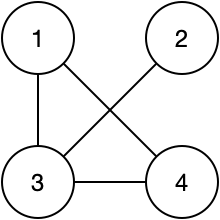

set {1,3,4} is a clique, but {1,2,3} is not. The clique problem is to decide whether a graph has a clique of size $k$. More formally, CLIQUE is the set of pairs $\langle G, k\rangle$ where $G$ is a graph and there is a subset of $k$ nodes that are pairwise connected by an edge.

Proof that CLIQUE is in NP: If $G$ is stored as an adjacency matrix, we can check whether a subset of nodes has size $k$ and is fully connected in $O(k^2)$ time.

Proof that CLIQUE is NP-hard: By reduction from 3SAT. We need to show how to convert a 3CNF formula $\phi$ into a graph and a number $k$.

To try to give some idea of the thought process needed to find a reduction (which is different from the way you'd actually write it), I present an

> Interior monologue:
>
> The input to CLIQUE is a graph, which has nodes and edges, and $k$. So maybe the variables will become nodes and the clauses edges? Or the variables will become edges and the clauses will become nodes? It's hard to say, so (not just here but in general) I think we will get more traction by thinking about certificates.
> 
> The certificates are subsets of $k$ nodes; in other words, a certificate says whether each node is in the subset or not, and there are exactly $k$ in it.
>
> - So maybe nodes could be variables, and a node belongs to the clique iff the variable is true? But it's not clear why we would want exactly $k$ variables to be true.
>
> - Another idea is to create a node for each variable and its negation. A node $x$ belongs to the clique if $x$ is true, and node $\neg x$ belongs to the clique if $x$ is false. Now we want exactly $l$ nodes to be in the clique. This idea works, but is not enough; we still need a way to represent clauses, and it will turn out that this idea will become unnecessary.
>
> - Maybe nodes could be literals, and a node belongs to the clique iff the literal is true? As in the first idea, it's not clear why we would want exactly $k$ literals to be true.
>
> - How about if a node belongs to the clique iff the literal is lucky? This is promising, because we want exactly $m$ literals to be lucky. 

For each literal in $\phi$, create a node in the graph $G$, and set $k = m$. 

> Here's what our example formula looks like so far. The blue nodes correspond to one possible set of lucky literals.
>
> 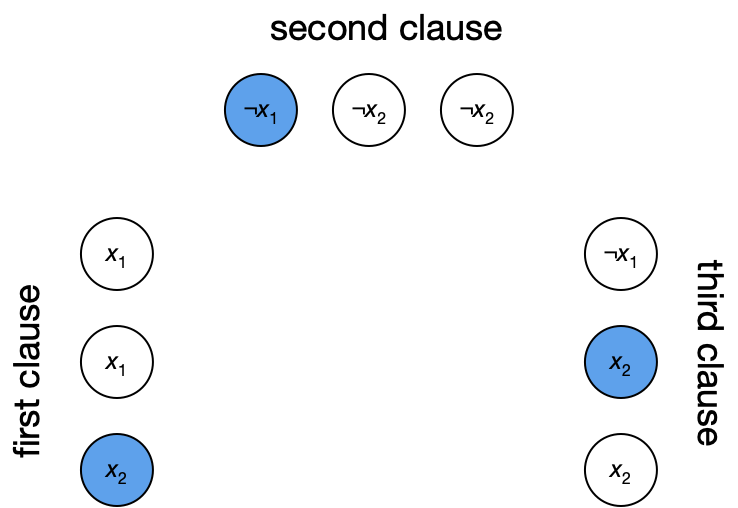
>
> This graph doesn't have any $k$-cliques, however, because it doesn't have any edges. Imagine adding all possible edges to this graph; now we have too many $k$-cliques.
>
> First, we must ensure that no clause has two lucky literals. We can do this by removing edges between nodes belonging to the same clause.
>
> Second, we must ensure that no two lucky literals are contradictory. We can do this by removing edges between nodes that are contradictory.

Add an edge between all pairs of nodes $u$ and $v$, except if $u$ and $v$ correpond to literals in the same clause or $u$ and $v$ correspond to contradictory literals.

For our example formula, here is the resulting graph:

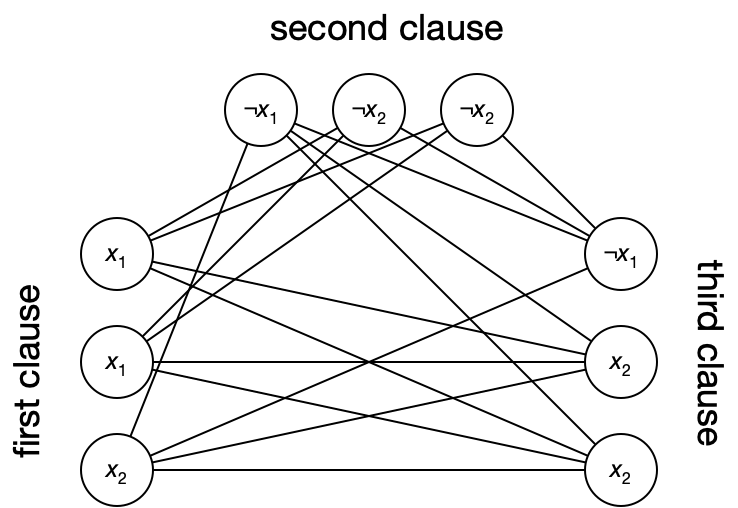

It may be easier to visualize the edges that are *not* added:

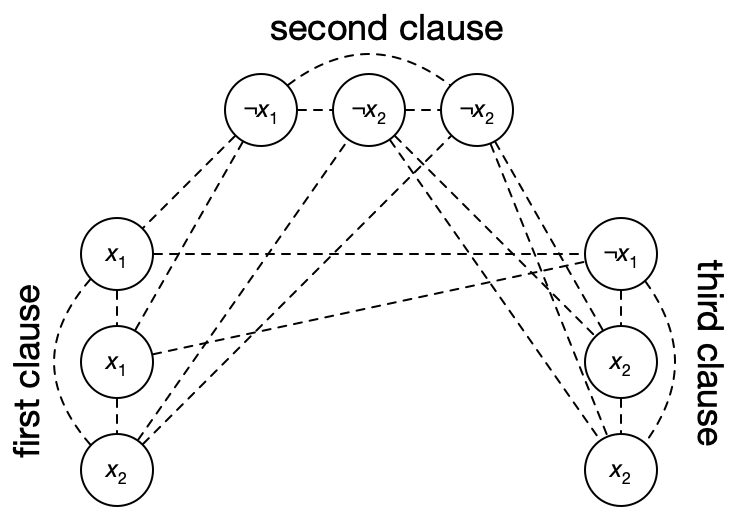

Here are the three cliques of this graph, corresponding to the three possible sets of lucky literals:

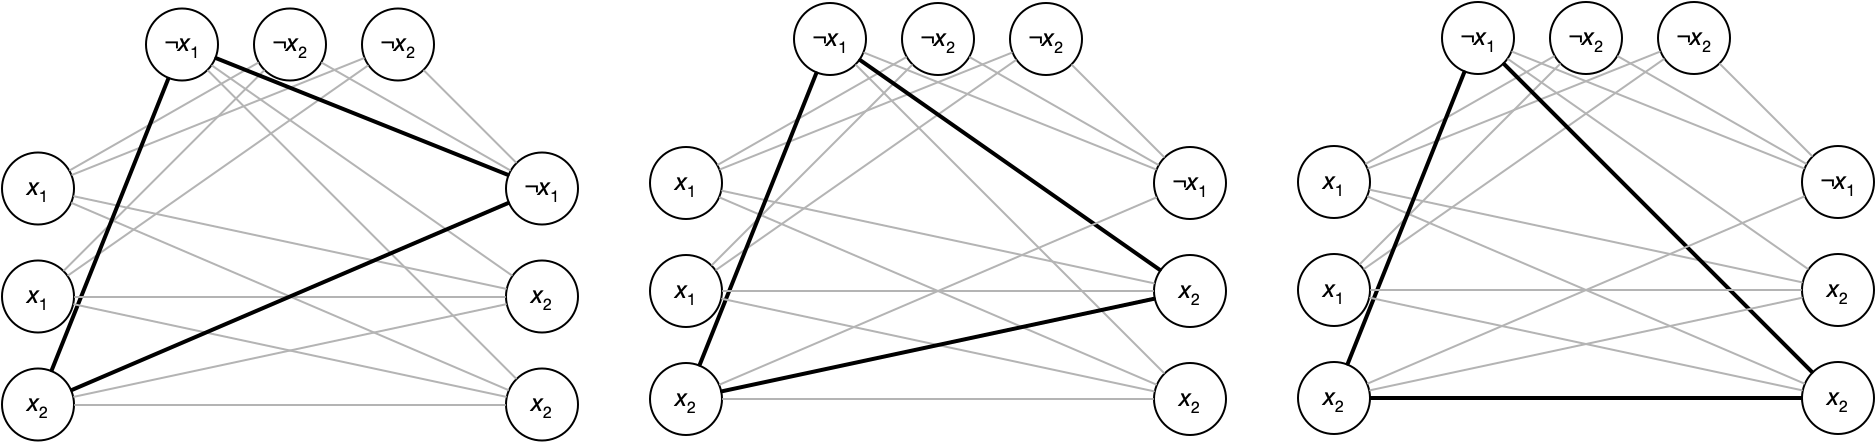

Next, we need to show that $\phi$ is satisfiable iff $G$ has a $k$-clique. Although we already thought this through, the order was backwards (as is often the case!) from the logical order. Please see the book for how this part of the proof should be written.

Finally, we need to show that constructing $G$ takes polynomial time. In this case, it's if you simply say this is obvious or (like the book) say nothing.

### The vertex cover problem

<div class="alert alert-info">
    <p><b>Read</b> pages 312-313.</p>
</div>

If $G$ is a graph, a *vertex cover* of $G$ is a subset $C$ of nodes such that every edge in $G$ touches a node in $C$. For example, in the graph

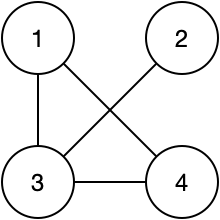

{1,3} and {3,4} are both vertex covers of size 2.

The vertex cover problem is to decide, given $G$ and a number $k$, whether $G$ has a vertex cover of size $k$. More formally, VERTEX-COVER is the set of pairs $\langle G, k\rangle$ where $G$ is a graph and there is a subset $C$ of $k$ nodes such that every edge in $G$ touches a node in $C$. 

Proof that VERTEX-COVER is in NP: If $G$ has $|V|$ nodes and is stored as an adjacency matrix, the size of the input is $n \in O(|V|^2 + \log k)$. We can check whether a subset $C$ is a vertex cover by looping over all $(u, v)$, and if $(u, v)$ is an edge of $G$, check that either $u$ or $v$ belongs to $C$. This takes $O(|V|^2) \leq O(n)$ time.

Proof that VERTEX-COVER is NP-hard: By reduction from 3SAT. We need to show how to convert a formula $\phi$ into a pair $\langle G, k\rangle$.

> Interior monologue:
> 
> Initially VERTEX-COVER seems very similar to CLIQUE; they have the same type of input (a graph $G$ and number $k$) and same type of certificate (a set of $k$ nodes). We can brainstorm possible reductions as before, and discard some of them immediately for the same reasons as before. The two viable ideas are:
>
> - For each variable $x$, create a node for $x$ and its negation $\neg x$. If $x$ is true, put node $x$ in $C$; if $x$ is false, put node $\neg x$ in $C$.
>
> - For each literal, create a node. If a literal is lucky, put its node in $C$.

> Let's think about the first idea. If we put an edge between $x$ and $\neg x$, we can ensure that, for each variable $x$, at least one node ($x$ or $\neg x$) belongs to $C$. And we can make it exactly one if we set $k = l$.
>
> 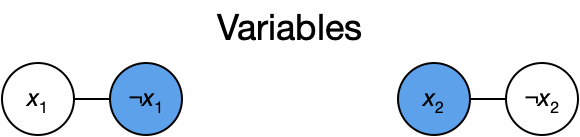

For each variable $x_i$, create a variable gadget containing a node for $x_i$ and a node for $\neg x_i$, and connect the two nodes with an edge.

> Now let's think about the second idea. We need to ensure that each clause has exactly one lucky literal.
>
> - If we could, we would draw an edge like this:
>
> 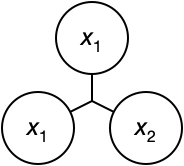
> 
> that would ensure that each clause has at least one lucky literal. But edges like this aren't allowed.
>
> - But if we connect all three literals in a clause by edges, then the vertex cover will have to contain at least two of them. We can make it exactly two by setting $k = l+2m$ ($l$ for the variable gadgets and $2m$ for the clause gadgets). So let's make the *unlucky* literals to be nodes in $C$.
>
> 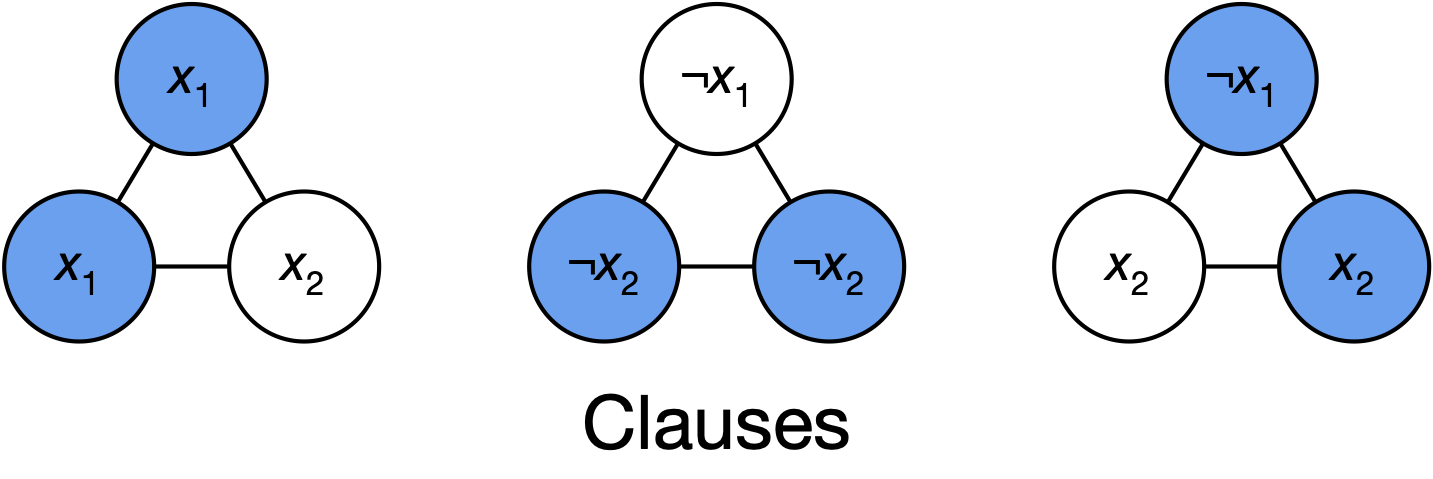

For each clause in $\phi$, create a clause gadget consisting of three nodes in $G$ labeled with its three literals, all connected by edges. Set $k = l+2m$.

> We still need to ensure that $\phi$ is true.
>
> For CLIQUE, we were able to ensure that no lucky literals are contradictory, by adding edges between nodes in the clause gadgets. You can try this for yourself and see that it won't work.
>
> Instead, can we ensure that every lucky literal is true? Consider a single clause, and imagine connecting each literal to another node like this:
>
>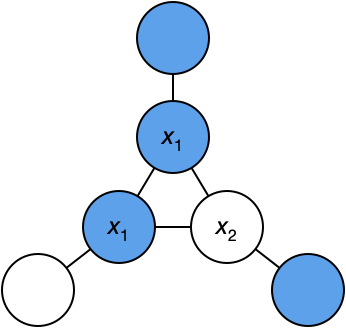
>
> The nodes connected to the unlucky literals could be in or out, but the node connected to the lucky literal ($x_2$) must be in. And in the variable gadgets, true nodes are in. So if we connect each literal $a$ in a clause gadget to node $a$ in the variable gadgets, we've encoded the constraint that lucky literals must be true.

For each variable-gadget node $u$ and each clause-gadget node $v$ with the same label, connect $u$ and $v$ with an edge. For our example formula, here's what the resulting graph looks like, with one possible $C$ marked in blue.

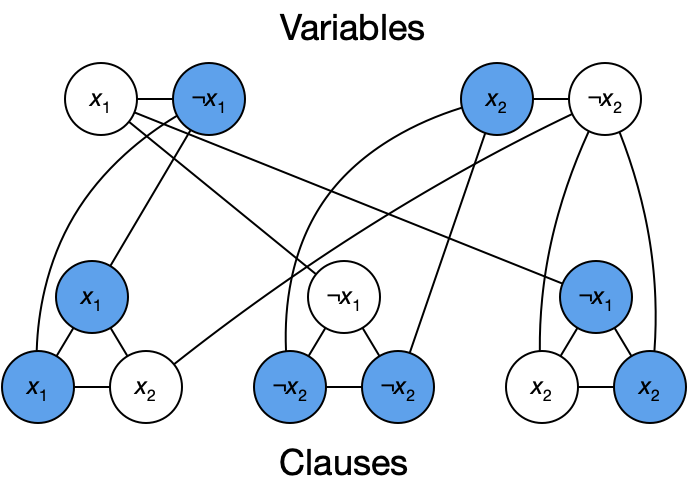

Now we need to show that $\phi$ is satisfiable iff $G$ has a $k$-vertex cover. Again, please see the book for how to write this, and again, it's okay to say that's obvious that the conversion runs in polynomial time.

### The subset-sum problem

<div class="alert alert-info">
    <p><b>Read</b> from the bottom of page 319 to the top of page 322.</p>
</div>

SUBSET-SUM is the set of pairs $\langle S, t\rangle$ where $S$ is a set of $n$ natural numbers and $t$ is a natural number, and there is a subset $C \subseteq S$ such that $\sum C = t$. For example, $\langle \{4,11,16,21,27\}, 25 \rangle$ belongs to SUBSET-SUM because $4+21=25$.

SUBSET-SUM is in NP because we can check whether a subset $C$ adds up to $t$ in $O(n)$ time.

We prove that SUBSET-SUM is NP-hard by reduction from 3SAT. We need to define a mapping from formulas $\phi$ to pairs $\langle S, t\rangle$.

> Interior monologue
>
> A certificate is a subset $C \subseteq S$; in other words, a certificate says for each $c \in C$ whether $c$ is "in" or "out".
>
> - We could create a number in $S$ for each literal, and $C$ contains the numbers corresponding to lucky literals.
>
> - We could create a number in $S$ for each variable and its negation, and $C$ contains the numbers corresponding to true variables and negations of false variables.
>
> Let's think about the first of these options. We can ensure that exactly one literal in each clause is lucky like so:
>
> 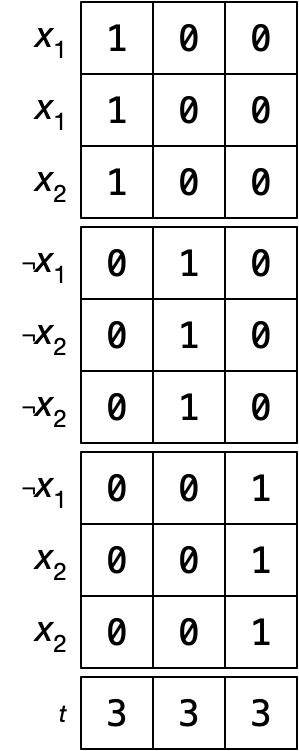
>
> But it's not clear how to ensure that no lucky literals are contradictory.

> So let's think more about the second option. We need to ensure that every variable is either true or false, and we need to ensure that each clause is true.
> 
> To ensure that every variable is true or false, we can do this:
>
> 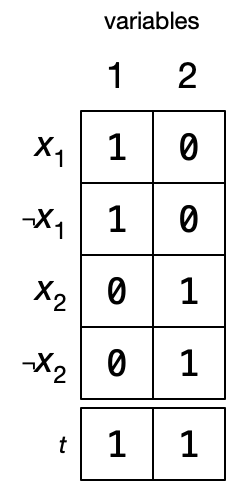

For each variable $x_i$, we will add two numbers, $p_i$ and $q_i$, to $S$, corresponding to $x_i$ and $\neg x_i$.

The first $l$ digits of each number are used to ensure that $p_i$ and $q_i$ are not both included in $C$. Let the $i$'th digit of $p_i$ and $q_i$ be 1; let the rest of the first $l$ digits be 0. Let the first $l$ digits of $t$ be 1's.

> To ensure that every clause is true, we can add a new digit for each clause, like this:
> 
> 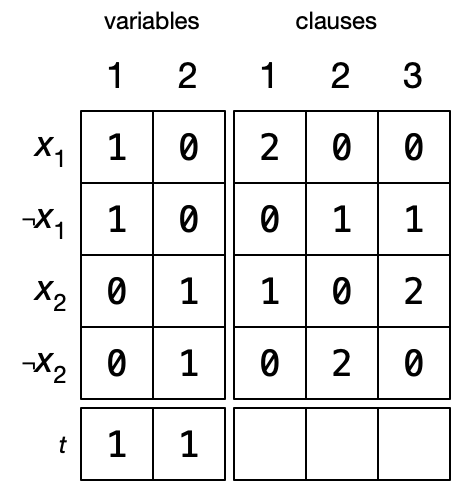

The next $m$ digits (that is, digits $l+1$ through $l+m$) are used to ensure that all clauses are true. Let the $(l+j)$th digit of $p_i$ be the number of times that $x_i$ occurs in the $j$th clause, and let the $(l+j)$th digit of $q_i$ be the number of times that $\neg x_i$ occurs in the $j$th clause.

> But, it's not clear what the values of these new digits in $t$ should be. In a satisfying assignment, *at least* one literal in every clause is true, but we only know how to use $t$ to enforce an *exact* number. We can fix this by adding some "slack" numbers to $S$:
>
> 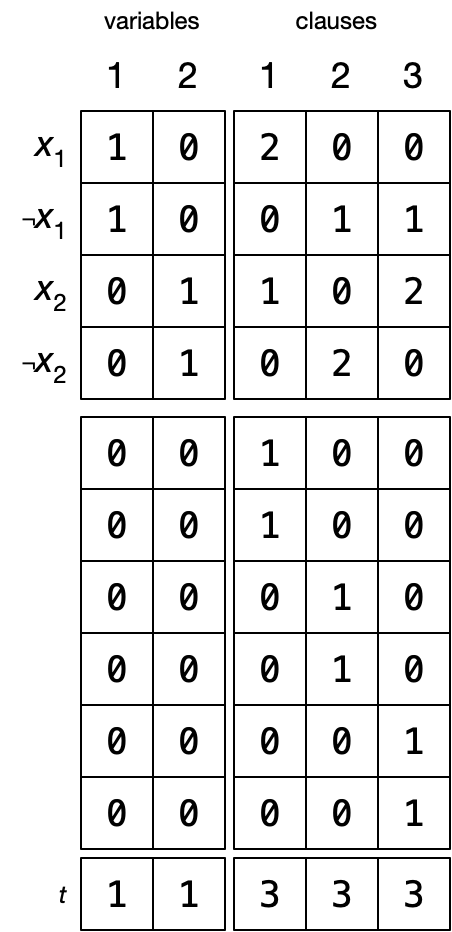
>
> Now, if a clause digit adds up to 1 or 2, we can use the "slack" numbers to bring the sum up to 3. But if a clause digit adds up to 0, there aren't enough "slack" numbers to bring the sum up to 3.

For each clause $j$, add two numbers that have a 1 in digit $l+j$ and 0's elsewhere.

Again, the proof that $\phi$ is satisfiable iff $S$ has a subset that sums to $t$ can be found in the book, and again it's obvious that $S$ and $t$ can be constructed in polynomial time.

# Wrap-up

We started this class by asking "What is a computer?" You knew already that everything a computer does is written in programming languages that compile down to assembly code, and in assembly you have access to registers, memory, a stack, etc. We saw in this class that you could, in principle, further compile assembly code down to the instructions of a Turing machine, which accesses its memory (an infinite tape) by moving one location at a time and reading/write one location at a time. We took Turing machines to be our definition of computer: if you're designing a computer or a computer language, it must be able to implement any Turing machine.

Boiling the model down further reduces its power dramatically. If you change out the tape for a read-only input and maybe a stack, you get machines (finite automata and pushdown automata) that can do much less than Turing machines can. What you get in exchange is the ability to reason about these machines more easily. For example, a finite automaton is guaranteed to run in linear time and constant space. You can test whether two finite automata are equivalent to each other. Even though a pushdown automaton can go into an infinite loop, you can always detect and remove them.

Those are things that you can't do with Turing machines. You also can't write a Turing machine that says whether another program will crash, or do something malicious. And therefore, there is no known computer program that can do any of these things, either.

Finally, having a formal definition of a computer allows us to make important generalizations about efficiency. There is a large class of combinatorial problems (NP-complete problems) that we think have no tractable solution, but they are all interrelated such that if one of them has a tractable solution, then they all do.

There are many more topics in formal language theory, computability theory, and complexity theory that we might have covered, but didn't have time for. Though many theory topics are rather abstract, there are many ideas, in this class and beyond, that can help you to design better systems -- or to know when a better one doesn't exist. I hope that you found at least something in this course interesting, and that at least something you learned will be useful to you down the road!